In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Review: Linear Regression

In [2]:
#load in mtcars.csv
cars = pd.read_csv('data/mtcars.csv')

In [3]:
#examine data set
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
#build regression to predict hp using mpg
#set X (independent variable)
X= cars[['mpg']]
#set y (what we want to predict)
y= cars['hp']

In [9]:
#instantiate the model
lr = LinearRegression()

In [10]:
#fit the model
lr.fit(X, y)

LinearRegression()

In [11]:
#what are the coefficients?
lr.coef_

array([-8.82973099])

In [12]:
#what is the intercept?
lr.intercept_

324.08231421252054

In [13]:
#predict y, based on X
yhat = lr.predict(X)

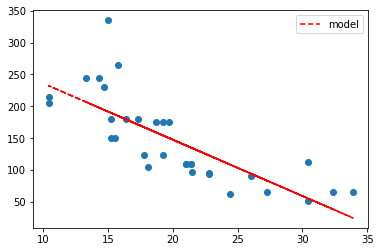

In [14]:
#plot results
plt.scatter(X,y)
plt.plot(cars['mpg'], yhat, '--r', label = 'model');
plt.legend();

In [17]:
#mean squared error
mean_squared_error(y, yhat, squared=False)
# on average, we were of by 42.54 hp.

42.54981046189499

In [ ]:
# so this line is a decent fit, but a curved line might be better than a straight line. 

### Bias-Variance: The Sweet Spot

In [ ]:
# two sources of error in a model: bias and variance
# this is not unique to regression, it's common across alot of data ,like samplling

### Bias and Variance in Sampling

- Take simple random samples of size 10
- Take simple random samples of size 100

In [ ]:
#create a fake population
population = np.random.normal(30, 8, 10_000)

In [23]:
population

array([21.09284319, 30.70637547, 28.0971869 , ..., 25.34431115,
       34.28973119, 23.25723715])

In [18]:
#samples of size 10 -- repeat 1000 times
population = np.random.normal(30, 8, 10_000)
s1 = [np.mean(np.random.choice(population, size = 10)) for _ in range(1000)]
s2 = [np.mean(np.random.choice(population, size = 100)) for _ in range(1000)]





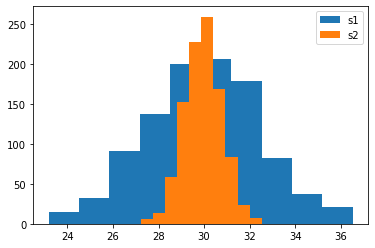

In [21]:
#histograms of each
plt.hist(s1, label='s1');
plt.hist(s2, label= 's2');
plt.legend();
# s1 has a wider spread- more variance. 
# but both samples are not biased, because they both have a mean of about 30
# which was the original mean. 
# similarly, your model can be biased in that it can over or under estimate
# could be due to outliers, could be due to lack of data. 

# co variance might not affect bias, but it can affect variance- so 
# it might affect the results of a model bc the vairables may be too correlated


### Regression Setting

In [ ]:
cars = pd.read_csv('data/mtcars.csv')

In [ ]:
#mpg vs. hp


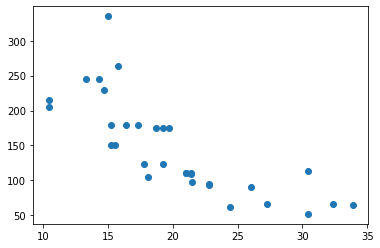

In [24]:
#scatterplot
plt.scatter(X, y)


### Reminder on Least Squares

$$f(m, b) = \sum_{i = 1}^n (y_i - (mx_i + b))^2$$

In [ ]:
#fit model
from sklearn.linear_model import LinearRegression


In [25]:
#plot residuals
X

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7
5,18.1
6,14.3
7,24.4
8,22.8
9,19.2


In [ ]:
#Any assumptions violated?  Why?


### Reminder: Quadratics

$$f(x) = ax^2 + bx + c$$


$$f(a, b, c) = \sum_{i = 1}^n (y_i - (ax_i^2 + bx_i + c))^2$$

In [ ]:
# quadratic function are another option for modelling- they're parabolas
# we can can also use this to try and minimize true values between
# in the cars exampoe, the x-es in the formula above are MPG
# so we're still looking for coefficients 
# we're using polynomials instead of linear regression

In [29]:
#examine X
X.head(5)

,mpg,mpg^2
0,21.0,441.00
1,21.0,441.00
2,22.8,519.84
3,21.4,457.96
4,18.7,349.69


In [28]:
#add new feature - we must manually square these features. 
#if you have multiple features, you will have to square each of them, if
# you think that they are actually quadratic features. 

X['mpg^2'] = X['mpg']**2

/var/folders/kz/klxfgxt54zg3ld3hw3501lf80000gp/T/ipykernel_48201/1230039856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mpg^2'] = X['mpg']**2


In [31]:
#build model on quadratic data
qr = LinearRegression().fit(X,y)

In [32]:
#look at coefficients
qr.coef_

array([-23.34451763,   0.33002884])

In [ ]:
#look at intercept

In [36]:
qr.intercept_

470.86947158376034

In [35]:
# this means our model is roughly:

-23.3 * mpg + .33 * mpg^2 + 470.89

In [37]:
#residuals - dif from mean (error, but not squared) so that we can see pos 
# and negative from the mean to see if we're over ot under predicting
resids = y- qr.predict(X)

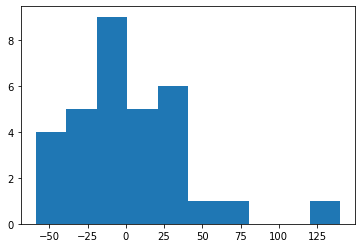

In [39]:
#plot these
plt.hist(resids);
# looks like we might be under predicting more often than not. 

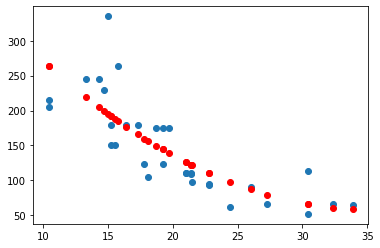

In [44]:
#plot predictions
plt.scatter(X.iloc[:,0], y)
plt.plot(X.iloc[:,0], qr.predict(X), 'ro')

In [46]:
mean_squared_error(y, qr.predict(X), squared=False)

40.28784288153709

In [47]:
mean_squared_error(y, yhat, squared=False)

42.54981046189499

In [48]:
# bc these variables interact with each other, it's tough to say that as 
# you increase X, y will change in a specific way. Bc boht coefficients will change

qr.coef_

array([-23.34451763,   0.33002884])

In [ ]:
# what if we want a cubic model?
# this would be like y = ax^3 plus bx^2 plus cx + d
# so we add a cubic term to the equation
# let's give it a try


In [51]:
X['mpg^3'] = X['mpg']**3

/var/folders/kz/klxfgxt54zg3ld3hw3501lf80000gp/T/ipykernel_48201/1139727504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mpg^3'] = X['mpg']**3


In [52]:
X.head(5)

,mpg,mpg^2,mpg^3
0,21.0,441.00,9261.000
1,21.0,441.00,9261.000
2,22.8,519.84,11852.352
3,21.4,457.96,9800.344
4,18.7,349.69,6539.203


In [54]:
cb = LinearRegression().fit(X,y)

In [55]:
cb.coef_

array([49.35225941, -3.24411866,  0.05492466])

In [56]:
cb.intercept_

9.530879592312886

In [57]:
results = cb.predict(X)

In [59]:
results

array([123.9292541 , 123.9292541 ,  99.32612788, 118.27319005,
       157.14576333, 165.69005588, 212.48943299,  80.18616432,
        99.32612788, 149.93293374, 169.89598942, 188.63936874,
       176.77702791, 203.0488999 , 233.69327329, 233.69327329,
       208.45693026,  71.10784618,  54.83368759,  94.16571787,
       116.87245239, 199.62395227, 203.0488999 , 221.28156194,
       149.93293374,  56.5583574 ,  65.02119621,  54.83368759,
       196.07478268, 142.67987497, 205.25879214, 118.27319005])

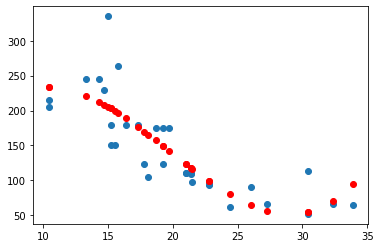

In [60]:
#plot predictions
plt.scatter(X.iloc[:,0], y)
plt.plot(X.iloc[:,0], results, 'ro')

In [61]:
mean_squared_error(y, results, squared=False)

37.730367303886396

In [ ]:
# this might be over fit, but not sure why 
# when a model is overfit- it will acrurately predict with training data set
# but it might not handle new data points very well
# usually when we're modelling, we want to consider multiple models
# so ideally, we would build a linear, a cubic and a quadratic
# then you have to decide between the models, which one is the best
#